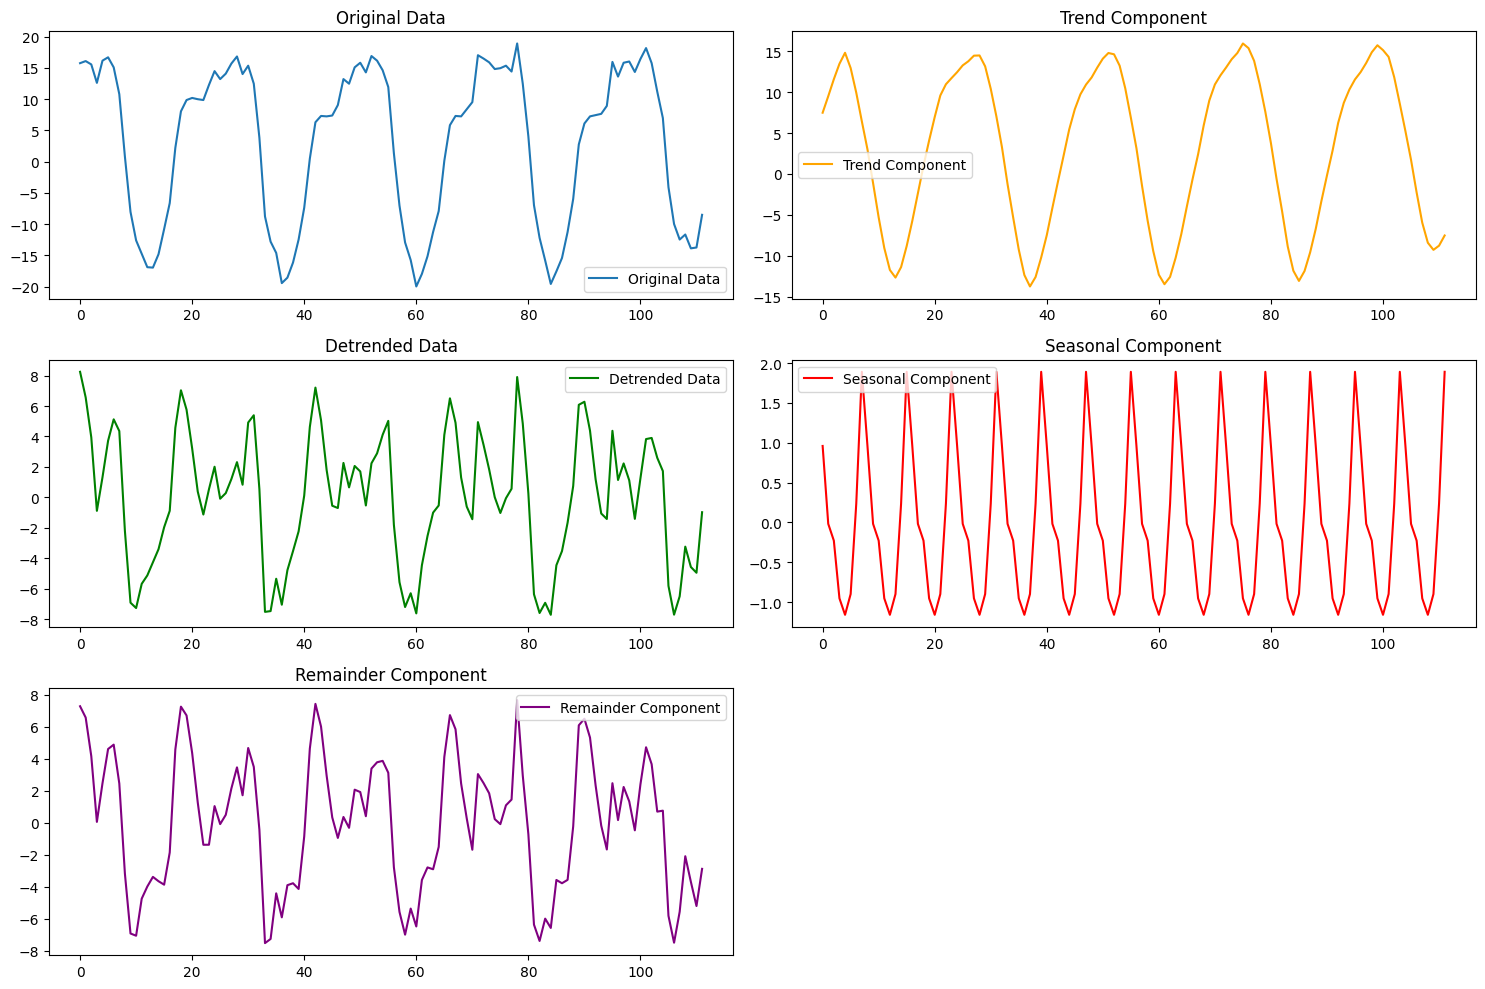

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.datasets import load_etth_display
# 读取保存的 etth_display_W112.csv 数据
#df = pd.read_csv('etth_display_W112.csv')
df = load_etth_display()
# 假设数据只有一个列，且该列为 'Best_Subsequence'
data = df['Best_Subsequence'].values

# 1. 提取趋势成分：计算 4 点移动平均 (4-MA)
window_size = 8
trend = np.convolve(data, np.ones(window_size)/window_size, mode='same')

# 2. 去趋势：将原始数据减去趋势成分
detrended = data - trend

# 3. 计算季节性成分：通过计算每个季节（在本例中是每 4 个数据点）均值来提取季节性成分
seasonal_cycle = np.zeros_like(data)
for i in range(window_size):
    seasonal_cycle[i::window_size] = np.mean(detrended[i::window_size])

# 4. 计算剩余部分：去除季节性和趋势成分后的剩余部分
remainder = detrended - seasonal_cycle

# 5. 绘制结果
plt.figure(figsize=(15, 10))

# 原始数据
plt.subplot(3, 2, 1)
plt.plot(data, label='Original Data')
plt.title('Original Data')
plt.legend()

# 趋势成分
plt.subplot(3, 2, 2)
plt.plot(trend, label='Trend Component', color='orange')
plt.title('Trend Component')
plt.legend()

# 去趋势后的数据
plt.subplot(3, 2, 3)
plt.plot(detrended, label='Detrended Data', color='green')
plt.title('Detrended Data')
plt.legend()

# 季节性成分
plt.subplot(3, 2, 4)
plt.plot(seasonal_cycle, label='Seasonal Component', color='red')
plt.title('Seasonal Component')
plt.legend()

# 剩余成分
plt.subplot(3, 2, 5)
plt.plot(remainder, label='Remainder Component', color='purple')
plt.title('Remainder Component')
plt.legend()

# 组合图形布局
plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# 生成复合时序数据
x = np.linspace(0, 1, 1024)
data = np.sin(2 * np.pi * 50 * x) + np.cos(2 * np.pi * 120 * x) + 0.5 * np.sin(2 * np.pi * 250 * x)

# 小波分解
wavelet = 'db4'
coeffs = pywt.wavedec(data, wavelet, level=4)

# 可视化原始数据和分解结果
plt.figure(figsize=(12, 8))
plt.subplot(6, 1, 1)
plt.plot(x, data, label='Original Data')
plt.title('Original Time Series Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
#plt.legend()

# 绘制各层分解
for i, coeff in enumerate(coeffs):
    plt.subplot(6, 1, i + 2)
    plt.plot(coeff, label=f'Level {i} Coefficients', color='purple')
    plt.title(f'DWT Level {i} Coefficients')
    plt.xlabel('Index')
    plt.ylabel('Amplitude')
    #plt.legend()

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'pywt'